In [157]:
#Import all dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print ('ready')

ready


In [158]:
#Load dataset with Pandas Library
df=pd.read_csv('Loan_default.csv')

In [159]:
#Having a quick view of the dataset
df.head()

,credit policy,purpose,interesr rate,installment,log annual inc,Debt to income ratio,Fico Credit Score,Days with Credit on the line,Revolving Balance,Revolving utilisation,6mths Inquiry,2 years deliquency,Public record,Default
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   credit policy                 9578 non-null   int64  
 1   purpose                       9578 non-null   object 
 2   interesr rate                 9578 non-null   float64
 3   installment                   9578 non-null   float64
 4   log annual inc                9578 non-null   float64
 5   Debt to income ratio          9578 non-null   float64
 6   Fico Credit Score             9578 non-null   int64  
 7   Days with Credit on the line  9578 non-null   float64
 8   Revolving Balance             9578 non-null   int64  
 9   Revolving utilisation         9578 non-null   float64
 10  6mths Inquiry                 9578 non-null   int64  
 11  2 years deliquency            9578 non-null   int64  
 12  Public record                 9578 non-null   int64  
 13  Def

In [161]:
df.describe()

,credit policy,interesr rate,installment,log annual inc,Debt to income ratio,Fico Credit Score,Days with Credit on the line,Revolving Balance,Revolving utilisation,6mths Inquiry,2 years deliquency,Public record,Default
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [162]:
#Checking the number of null values in the dataset, there are 150 nulls in the target column, this will need to be addressed to ensure data integrity.
df.isnull().sum()

credit policy                   0
purpose                         0
interesr rate                   0
installment                     0
log annual inc                  0
Debt to income ratio            0
Fico Credit Score               0
Days with Credit on the line    0
Revolving Balance               0
Revolving utilisation           0
6mths Inquiry                   0
2 years deliquency              0
Public record                   0
Default                         0
dtype: int64

In [163]:
df.shape

(9578, 14)

In [164]:
df.columns

Index(['credit policy', 'purpose', 'interesr rate', 'installment',
       'log annual inc', 'Debt to income ratio', 'Fico Credit Score',
       'Days with Credit on the line', 'Revolving Balance',
       'Revolving utilisation', '6mths Inquiry', '2 years deliquency',
       'Public record', 'Default'],
      dtype='object')

In [165]:
value_counts = df['Default'].value_counts()

# Print or use the value counts
print(value_counts)

Default
0    8045
1    1533
Name: count, dtype: int64


In [166]:
df['Default'].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='Default', ylabel='count'>

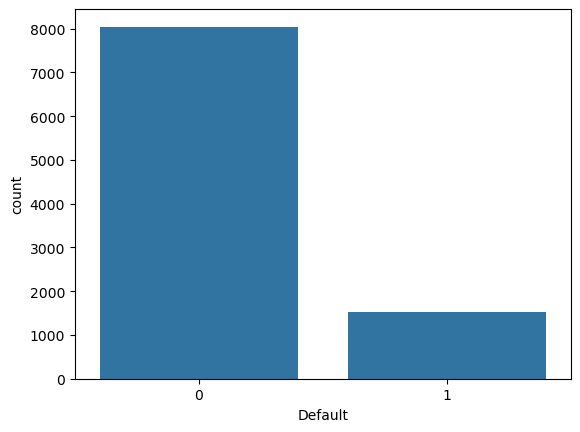

In [167]:
sns.countplot(x='Default', data=df)
# A chaeck of the target colums shows the distribution is not balanced, this would be addressed to ensure the model is not porrly trained.

In [168]:
### Encoding categorical data using OneHot Encoding
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [169]:


# Assuming df is your DataFrame and 'column_name' is the column you want to encode
# Apply one-hot encoding
encoded_df = pd.get_dummies(df['purpose'], prefix='enc_purpose')

# Concatenate the original DataFrame with the encoded columns
df_encoded = pd.concat([df, encoded_df], axis=1)

# Drop the original column if needed
df_encoded.drop(['purpose'], axis=1, inplace=True)

# Now 'df_encoded' contains the original DataFrame with the specified column one-hot encoded


In [170]:
df_encoded.columns

Index(['credit policy', 'interesr rate', 'installment', 'log annual inc',
       'Debt to income ratio', 'Fico Credit Score',
       'Days with Credit on the line', 'Revolving Balance',
       'Revolving utilisation', '6mths Inquiry', '2 years deliquency',
       'Public record', 'Default', 'enc_purpose_all_other',
       'enc_purpose_credit_card', 'enc_purpose_debt_consolidation',
       'enc_purpose_educational', 'enc_purpose_home_improvement',
       'enc_purpose_major_purchase', 'enc_purpose_small_business'],
      dtype='object')

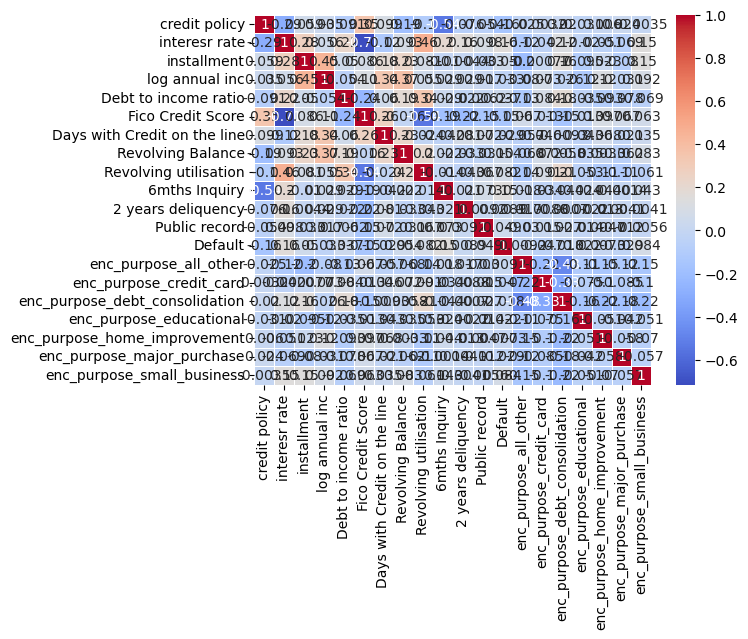

In [171]:
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

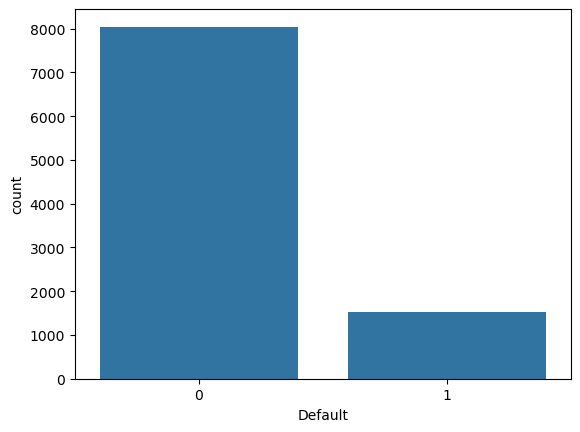

In [172]:
# Plot the number of 1's and 0's
sns.countplot(x='Default',data=df_encoded); # To be treated as imbalance data set

### Upsampling the minority class

In [173]:
print("No of 1's:{}".format(df_encoded.Default[df_encoded.Default==1].count()))
print("No of 0's:{}".format(df_encoded.Default[df_encoded.Default==0].count()))

No of 1's:1533
No of 0's:8045


In [174]:
# Resample minority class to equal majority class
from sklearn.utils import resample
minority=df_encoded[df_encoded.Default==1]
majority=df_encoded[df_encoded.Default==0]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
df_2 = np.vstack((majority, minority_upsampled))
df_2=pd.concat([majority,minority_upsampled],axis=0)

In [175]:
print("No of 1's:{}".format(df_2.Default[df_2.Default==1].count()))
print("No of 0's:{}".format(df_2.Default[df_2.Default==0].count()))

No of 1's:8045
No of 0's:8045


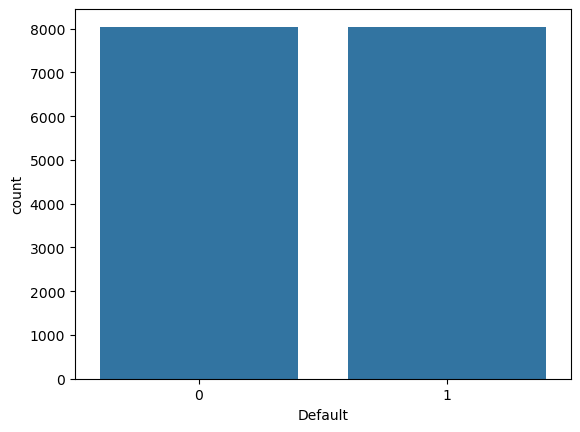

In [176]:
# Plot the number of 1's and 0's to confirm target features are now balanced
sns.countplot(x='Default',data=df_2); # To be treated as imbalance data set

### Data Normalisation

In [177]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [178]:
#Create a MinMaxScaler
scaler = MinMaxScaler()

In [179]:
X=df_2.drop(['Default'],axis=1)
y=df_2.Default

In [180]:
# Fit and transform the data
X_transform= scaler.fit_transform(X)

In [181]:
X_transform

array([[1.        , 0.37659847, 0.87988794, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.3011509 , 0.22991552, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.48401535, 0.37988253, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.55051151, 0.20681039, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.43734015, 0.20123963, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.22058824, 0.22542646, ..., 0.        , 0.        ,
        0.        ]])

### Building a Classifier

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42)

### RandomForest Classifier

In [184]:
from sklearn.ensemble import RandomForestClassifier

# Create the RandomForestClassifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)


### XGBoost Classifier

In [185]:
import xgboost as xgb

# Create the XGBoost Classifier model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)


In [186]:
# Evaluate the Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
_, accuracy = nn_model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)



c:\Users\LENOVO\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5820 - loss: 0.6702 - val_accuracy: 0.6373 - val_loss: 0.6385
Epoch 2/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6099 - loss: 0.6522 - val_accuracy: 0.6384 - val_loss: 0.6314
Epoch 3/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6299 - loss: 0.6369 - val_accuracy: 0.6350 - val_loss: 0.6297
Epoch 4/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6191 - loss: 0.6391 - val_accuracy: 0.6408 - val_loss: 0.6289
Epoch 5/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6325 - loss: 0.6314 - val_accuracy: 0.6513 - val_loss: 0.6244
Epoch 6/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6349 - loss: 0.6283 - val_accuracy: 0.6641 - val_loss: 0.6193
Epoch 7/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6376 - loss: 0.6266 - val_accuracy: 0.6536 - val_loss: 0.6253
Epoch 8/10
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6402 - loss: 0.6260 - val_accuracy: 0.

### Pefromance Evaluation of RandomForest Classifier and XGBoost Classifier:

In [187]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate RandomForest Classifier
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Evaluate XGBoost Classifier
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Print evaluation metrics for RandomForest Classifier
print("RandomForest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("Confusion Matrix:\n", rf_conf_matrix)

# Print evaluation metrics for XGBoost Classifier
print("\nXGBoost Classifier:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-score:", xgb_f1)
print("Confusion Matrix:\n", xgb_conf_matrix)


RandomForest Classifier:
Accuracy: 0.9714108141702921
Precision: 0.9623655913978495
Recall: 0.9823170731707317
F1-score: 0.972238986119493
Confusion Matrix:
 [[1515   63]
 [  29 1611]]

XGBoost Classifier:
Accuracy: 0.8955873213175886
Precision: 0.8586358635863587
Recall: 0.9518292682926829
F1-score: 0.902834008097166
Confusion Matrix:
 [[1321  257]
 [  79 1561]]


### Performance Evaluation of NN

In [188]:
# Evaluate the Neural Network
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test)

# Print evaluation metrics for Neural Network
print("\nNeural Network:")
print("Accuracy:", nn_accuracy)
print("Loss:", nn_loss)


  1/101 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6250 - loss: 0.6637

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6225 - loss: 0.6452

Neural Network:
Accuracy: 0.6435674428939819
Loss: 0.6311659812927246


In [194]:
import pandas as pd

# Create DataFrame for initial performance
performance = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Performance': [accuracy, rf_precision, rf_recall, rf_f1],
})



# Print the merged DataFrame
print(performance)


      Metric  Performance
0   Accuracy     0.643567
1  Precision     0.962366
2     Recall     0.982317
3   F1-score     0.972239


In [195]:
import pandas as pd

# Create a DataFrame to store the  results of each  model
results_df = pd.DataFrame({
    'Model': ['RandomForest', 'XGBoost', 'NeuralNetwork'],
    'Best Accuracy': [rf_accuracy, xgb_accuracy, nn_accuracy],
    'Best Precision': [rf_precision, xgb_precision, None],  # Not calculated for Neural Network
    'Best Recall': [rf_recall, xgb_recall, None],  # Not calculated for Neural Network
    'Best F1-score': [rf_f1, xgb_f1, None],  # Not calculated for Neural Network
})

# Print the DataFrame
print(results_df)


           Model  Best Accuracy  Best Precision  Best Recall  Best F1-score
0   RandomForest       0.971411        0.962366     0.982317       0.972239
1        XGBoost       0.895587        0.858636     0.951829       0.902834
2  NeuralNetwork       0.643567             NaN          NaN            NaN


In [197]:
from joblib import dump

# Save the best RandomForest Classifier model
dump(rf_model, 'rf_model.pkl')


['rf_model.pkl']